In [1]:
import os
import pandas as pd
import numpy as np


# Get current working directory
current_dir = os.getcwd()

# Navigate to data folder
data_dir = os.path.join(current_dir, "data")

# Read CSV file
df = pd.read_csv(os.path.join(data_dir, "faers_asthma.csv"), sep=",")


In [2]:
print(df.head)

<bound method NDFrame.head of        Case ID Suspect Product Names   Suspect Product Active Ingredients  \
0      4974950           A-Methapred  Methylprednisolone Sodium Succinate   
1      4974946           A-Methapred  Methylprednisolone Sodium Succinate   
2      4652544           A-Methapred  Methylprednisolone Sodium Succinate   
3      4656790           A-Methapred  Methylprednisolone Sodium Succinate   
4      4610124           A-Methapred  Methylprednisolone Sodium Succinate   
...        ...                   ...                                  ...   
92319  4230505                     -                       Nitrofurantoin   
92320  4236734                     -                           Gentamicin   
92321  4235917                     -                              Aspirin   
92322  4234961                     -               Gold Sodium Thiomalate   
92323  4227900                     -                              Aspirin   

      Reason for Use                         

In [3]:
# Before making any changes to the variables - what does the distribution look like?
# select the columns of interest
cols_of_interest = ['Suspect Product Names', 'Reason for Use', 'Suspect Product Active Ingredients',
                    'Reactions', 'Serious', 'Sex', 'Patient Age', 'Patient Weight',
                    'Reporter Type', 'Report Source', 'Concomitant Product Names',
                    'Country where Event occurred', 'Outcomes', 'Reported to Manufacturer?']

# get basic descriptive statistics for the numeric columns
numeric_cols = ['Patient Age', 'Patient Weight']
print(df[numeric_cols].describe())


# get basic descriptive statistics for the categorical columns
categorical_cols = list(set(cols_of_interest) - set(numeric_cols))
for col in categorical_cols:
    print(df[col].value_counts())

          Patient Age Patient Weight
count           92324          92324
unique           1124           2801
top     Not Specified  Not Specified
freq            31174          70933
Not Specified                                                       68484
Health Professional                                                 13816
Consumer                                                             4319
Health Professional ,Foreign                                         1347
Health Professional ,Study                                            516
                                                                    ...  
Company Representative ,Health Professional ,Distributor,Foreign        1
Company Representative ,Study,Foreign                                   1
User Facility ,Health Professional ,Distributor                         1
User Facility ,Health Professional ,Literature                          1
Consumer,Literature                                                     1
N

-                                                                                                                                                                                                                                            18318
Asthma                                                                                                                                                                                                                                       16960
Product Used For Unknown Indication                                                                                                                                                                                                           9727
Asthma;Product Used For Unknown Indication                                                                                                                                                                                                    8752
Rheumatoid Arthritis        

In [4]:
#Create Patient Age column to be only numeric
df['Patient Age'] = df['Patient Age'].str.extract('(\d+)').astype(float)



In [5]:
#Create Patient Weight column to be only numeric 
df['Patient Weight'] = df['Patient Weight'].str.extract('(\d+)').astype(float)


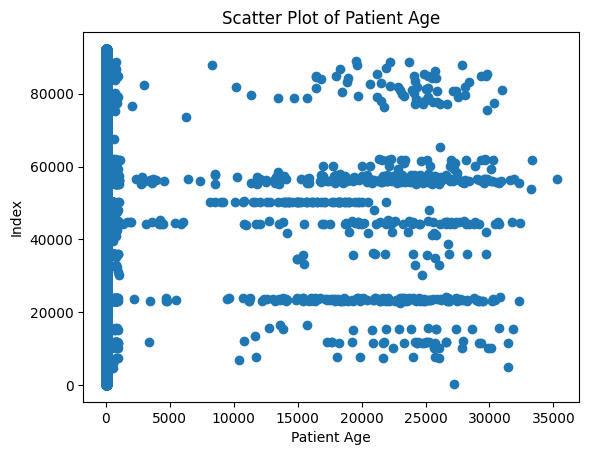

In [6]:
#Visualizing patient age
import matplotlib.pyplot as plt

# create a scatter plot of patient age
plt.scatter(df['Patient Age'], range(len(df)))
plt.xlabel('Patient Age')
plt.ylabel('Index')
plt.title('Scatter Plot of Patient Age')
plt.show()


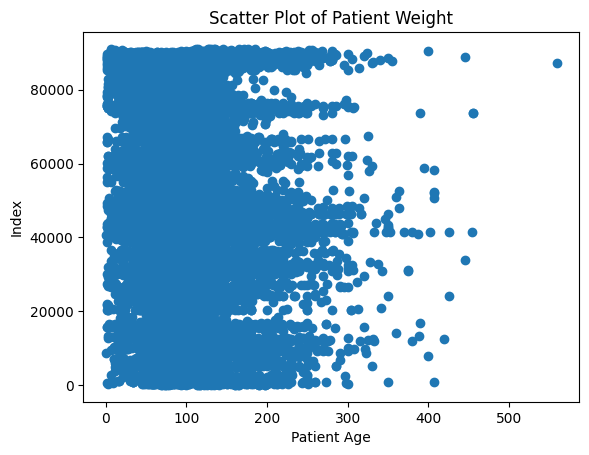

In [7]:
#visualizing patient weight

import matplotlib.pyplot as plt

# create a scatter plot of patient age
plt.scatter(df['Patient Weight'], range(len(df)))
plt.xlabel('Patient Age')
plt.ylabel('Index') 
plt.title('Scatter Plot of Patient Weight')
plt.show()


In [8]:
# get basic descriptive statistics for the numeric columns - After making them nominal variables
numeric_cols = ['Patient Age', 'Patient Weight']
print(df[numeric_cols].describe())


        Patient Age  Patient Weight
count  61150.000000    21391.000000
mean     271.105004       94.413211
std     2212.847300       50.444914
min        0.000000        0.000000
25%       39.000000       64.000000
50%       54.000000       81.000000
75%       66.000000      111.000000
max    35248.000000      559.000000


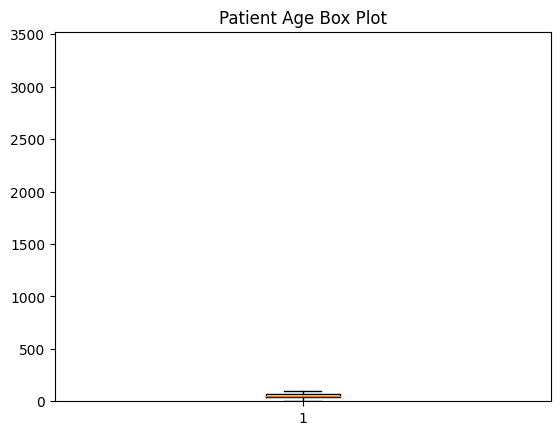

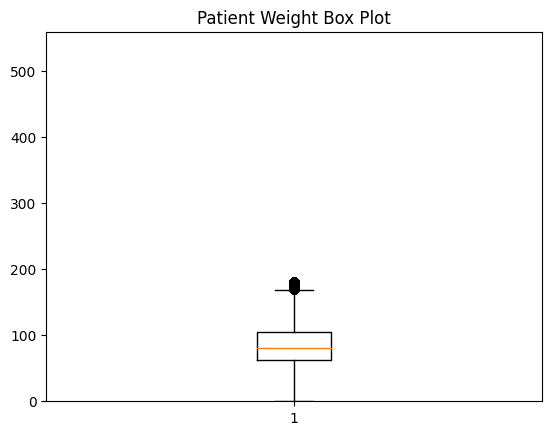

In [26]:
##median, quartiles, and any outliers before removing outliers - There is an issue with large amounts of patients' ages being incorrect
import matplotlib.pyplot as plt

# Create box plot for Patient Age
plt.boxplot(df['Patient Age'])
plt.title('Patient Age Box Plot')
plt.ylim(bottom=0
         , top=3525)
plt.show()

# Create box plot for Patient Weight
plt.boxplot(df['Patient Weight'])
plt.title('Patient Weight Box Plot')
plt.ylim(bottom=0, top=559)
plt.show()


In [27]:
# calculate the IQR for Patient Age and Patient Weight
q1_age = df['Patient Age'].quantile(0.25)
q3_age = df['Patient Age'].quantile(0.75)
iqr_age = q3_age - q1_age

q1_weight = df['Patient Weight'].quantile(0.25)
q3_weight = df['Patient Weight'].quantile(0.75)
iqr_weight = q3_weight - q1_weight

# remove any data points outside of 1.5 times the IQR
df = df[(df['Patient Age'] >= q1_age - 1.5*iqr_age) & (df['Patient Age'] <= q3_age + 1.5*iqr_age)]
df = df[(df['Patient Weight'] >= q1_weight - 1.5*iqr_weight) & (df['Patient Weight'] <= q3_weight + 1.5*iqr_weight)]



In [28]:
# get basic descriptive statistics for the numeric columns - After removing outliers
numeric_cols = ['Patient Age', 'Patient Weight']
print(df[numeric_cols].describe())

        Patient Age  Patient Weight
count  15214.000000    15214.000000
mean      50.194821       83.323255
std       20.528911       33.059840
min        0.000000        0.000000
25%       38.000000       62.000000
50%       54.000000       79.000000
75%       65.000000      101.000000
max      101.000000      169.000000


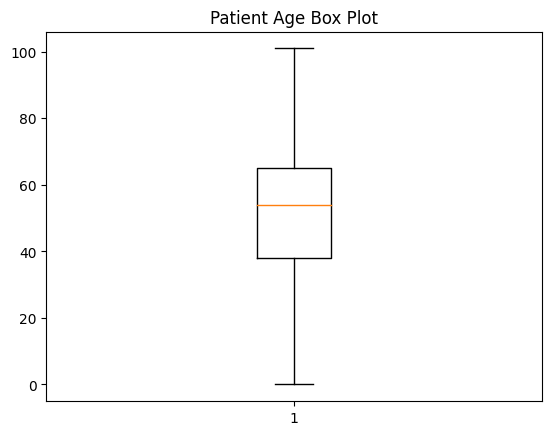

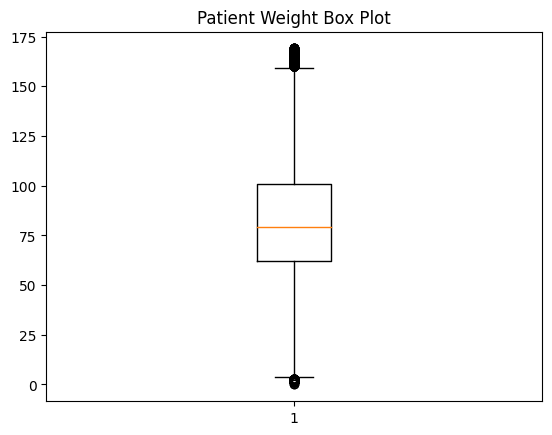

In [29]:
#median, quartiles, and any outliers after removing outliers
import matplotlib.pyplot as plt

# Create box plot for Patient Age
plt.boxplot(df['Patient Age'])
plt.title('Patient Age Box Plot')
plt.show()

# Create box plot for Patient Weight
plt.boxplot(df['Patient Weight'])
plt.title('Patient Weight Box Plot')
plt.show()


In [30]:
median_age = df['Patient Age'].median()
df['Patient Age'].fillna(median_age, inplace=True)

In [31]:
median_weight = df['Patient Weight'].median()
df['Patient Weight'].fillna(median_weight, inplace=True)

In [32]:
print(df.columns)

Index(['Case ID', 'Suspect Product Names',
       'Suspect Product Active Ingredients', 'Reason for Use', 'Reactions',
       'Serious', 'Outcomes', 'Sex', 'Event Date', 'Latest FDA Received Date',
       'Case Priority', 'Patient Age', 'Patient Weight', 'Sender',
       'Reporter Type', 'Report Source', 'Concomitant Product Names',
       'Latest Manufacturer Received Date', 'Initial FDA Received Date',
       'Country where Event occurred', 'Reported to Manufacturer?',
       'Manufacturer Control Number', 'Literature Reference',
       'Compounded Flag'],
      dtype='object')


In [33]:

# Replace values with 1 and 0 for 'Serious' variable
df['Serious'] = df['Serious'].replace({'Serious': 1, 'Non-Serious': 0})

# Convert variable to categorical variable
df['Serious'] = df['Serious'].astype('category')

df['Serious']

6        1
31       1
33       1
35       1
36       1
        ..
90959    1
90968    1
90970    1
90974    1
91045    1
Name: Serious, Length: 15214, dtype: category
Categories (2, int64): [0, 1]

In [34]:

# Replace values with 1 and 0 for 'Case Priority' variable
df['Case Priority'] = df['Serious'].replace({'Expedited': 1, 'Non-Expedited': 0, 'Direct': 2, '30-DAY': 3, '5-Day': 4, 'BSR': 5})

# Convert variable to categorical variable
df['Case Priority'] = df['Case Priority'].astype('category')

df['Case Priority']

6        1
31       1
33       1
35       1
36       1
        ..
90959    1
90968    1
90970    1
90974    1
91045    1
Name: Case Priority, Length: 15214, dtype: category
Categories (2, int64): [0, 1]

In [35]:

# Replace values with 1 and 0 for 'Sex' variable
df['Sex'] = df['Sex'].replace({'Male': 1, 'Female': 2, 'Direct': 2, 'Not Specified': 0})

# Convert variable to categorical variable
df['Sex'] = df['Case Priority'].astype('category')

df['Sex']

6        1
31       1
33       1
35       1
36       1
        ..
90959    1
90968    1
90970    1
90974    1
91045    1
Name: Sex, Length: 15214, dtype: category
Categories (2, int64): [0, 1]

In [36]:

# Replace values with 1 and 0 for 'Reported to Manufacturer?' variable
df['Reported to Manufacturer?'] = df['Reported to Manufacturer?'].replace({'Y': 1, 'Not Specified': 0})

# Convert variable to categorical variable
df['Reported to Manufacturer?'] = df['Reported to Manufacturer?'].astype('category')

df['Reported to Manufacturer?']

6        0
31       0
33       0
35       0
36       0
        ..
90959    0
90968    0
90970    0
90974    0
91045    0
Name: Reported to Manufacturer?, Length: 15214, dtype: category
Categories (2, int64): [0, 1]

In [37]:
# Replace values with 1,2, and 0 for 'Reporter Type' variable
df['Reporter Type'] = df['Reporter Type'].replace({'Consumer': 1, 'Healthcare Professional': 2, 'Not Specified': 0})

# Convert variable to categorical variable
df['Reporter Type'] = df['Reporter Type'].astype('category')

df['Reporter Type']

6        0
31       2
33       1
35       2
36       1
        ..
90959    2
90968    2
90970    2
90974    1
91045    2
Name: Reporter Type, Length: 15214, dtype: category
Categories (3, int64): [0, 1, 2]

In [38]:
cleaned_data = df[['Suspect Product Names', 'Reason for Use', 'Suspect Product Active Ingredients', 'Reactions', 'Serious', 'Sex',
                   'Patient Age', 'Patient Weight','Reporter Type','Report Source', 'Concomitant Product Names','Country where Event occurred', 'Outcomes','Reported to Manufacturer?',]]
print(cleaned_data)


      Suspect Product Names  \
6                    Aarane   
31               Abbokinase   
33               Abbokinase   
35               Abbokinase   
36               Abbokinase   
...                     ...   
90959                     -   
90968                     -   
90970                     -   
90974                     -   
91045                     -   

                                          Reason for Use  \
6      Asthma;Exposure To Allergen;Prophylaxis;Rhinit...   
31                                                     -   
33                                                     -   
35                                                     -   
36                                                     -   
...                                                  ...   
90959                                                  -   
90968                                                  -   
90970                                                  -   
90974                      

In [39]:
#cleaned_data.to_csv('cleaned_data.csv', index=False)

In [40]:

# select the columns of interest
cols_of_interest = ['Suspect Product Names', 'Reason for Use', 'Suspect Product Active Ingredients',
                    'Reactions', 'Serious', 'Sex', 'Patient Age', 'Patient Weight',
                    'Reporter Type', 'Report Source', 'Concomitant Product Names',
                    'Country where Event occurred', 'Outcomes', 'Reported to Manufacturer?']

# get basic descriptive statistics for the numeric columns
numeric_cols = ['Patient Age', 'Patient Weight']
print(cleaned_data[numeric_cols].describe())


# get basic descriptive statistics for the categorical columns
categorical_cols = list(set(cols_of_interest) - set(numeric_cols))
for col in categorical_cols:
    print(cleaned_data[col].value_counts())


        Patient Age  Patient Weight
count  15214.000000    15214.000000
mean      50.194821       83.323255
std       20.528911       33.059840
min        0.000000        0.000000
25%       38.000000       62.000000
50%       54.000000       79.000000
75%       65.000000      101.000000
max      101.000000      169.000000
Not Specified                                                            10056
Health Professional                                                       2844
Consumer                                                                  1085
Health Professional ,Foreign                                               205
Consumer,Health Professional                                               189
Other,Health Professional ,Foreign                                         154
Health Professional ,Study,Foreign                                          98
Health Professional ,Study                                                  82
Company Representative ,Health Professional 

In [41]:
print(cleaned_data)

      Suspect Product Names  \
6                    Aarane   
31               Abbokinase   
33               Abbokinase   
35               Abbokinase   
36               Abbokinase   
...                     ...   
90959                     -   
90968                     -   
90970                     -   
90974                     -   
91045                     -   

                                          Reason for Use  \
6      Asthma;Exposure To Allergen;Prophylaxis;Rhinit...   
31                                                     -   
33                                                     -   
35                                                     -   
36                                                     -   
...                                                  ...   
90959                                                  -   
90968                                                  -   
90970                                                  -   
90974                      

In [42]:
cleaned_data.describe()


,Patient Age,Patient Weight
count,15214.000000,15214.000000
mean,50.194821,83.323255
std,20.528911,33.059840
min,0.000000,0.000000
25%,38.000000,62.000000
50%,54.000000,79.000000
75%,65.000000,101.000000
max,101.000000,169.000000
